In [6]:
import os, io
from google import genai
from IPython.display import Image, display, Markdown
from PIL import Image as PILImage
import os

In [2]:
#! pip install google-genai
#!pip install replicate

In [19]:
api_key=os.getenv("GEMINI_API_KEY")

In [20]:
# Define Gemini model id 
model_id = "gemini-2.0-flash-exp"


In [21]:
# helper method to display images
def display_image(data):
    display(Image(data=data))

def save_image(data, filename):
    image = PILImage.open(io.BytesIO(data))
    image.save(filename)

In [22]:
client = genai.Client(api_key=api_key)

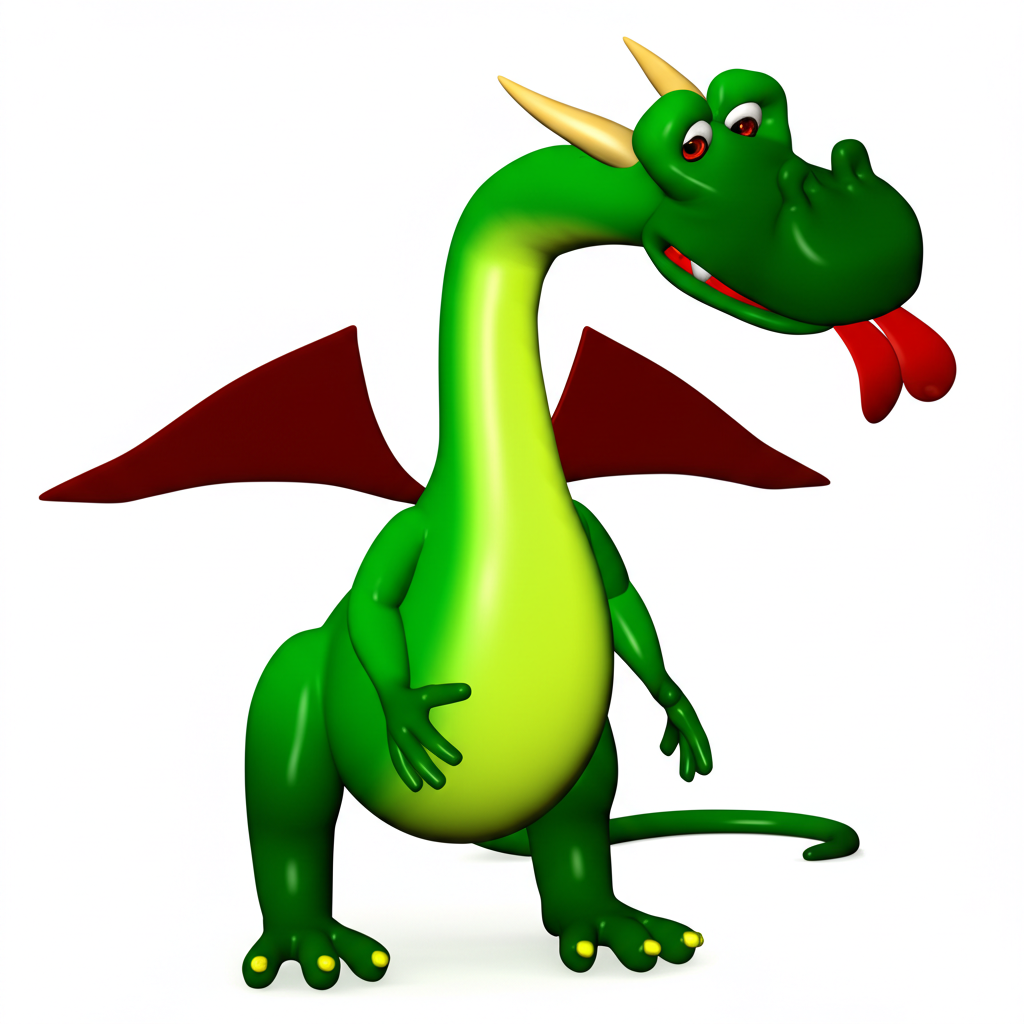

In [24]:
from google.genai.types import GenerateContentConfig 

# Define generation config to include image output
config = GenerateContentConfig(response_modalities=['Text', 'Image'])

# Image generation prompt
prompt = "A 3D Image of a cartoon green dragon with red tounge"

# Generate the image
response = client.models.generate_content(
    model=model_id,
    contents=prompt,
    config=config
)


# Iterate over the response candidates and display the image and text
for part in response.candidates[0].content.parts:
    if part.inline_data:
        display_image(part.inline_data.data)
        save_image(part.inline_data.data, f"dragon.png")
    else:
        display(Markdown(part.text))

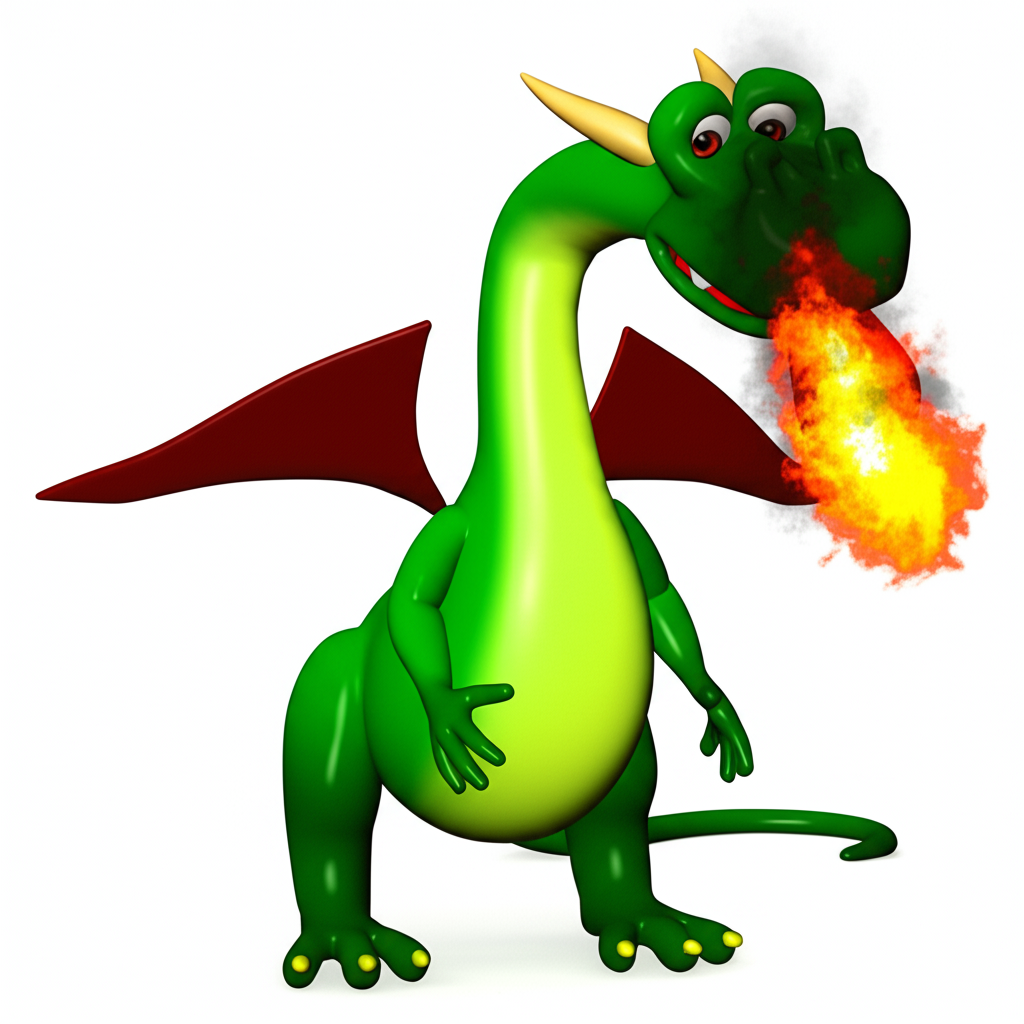

In [25]:
prompt = "Make the dragon breath fire"

# Generate the image
response = client.models.generate_content(
    model=model_id,
    contents=[prompt,PILImage.open("dragon.png")],
    config=config
)

for part in response.candidates[0].content.parts:
    if part.inline_data:
        display_image(part.inline_data.data)
        save_image(part.inline_data.data, f"dragon2.png")
    else:
        display(Markdown(part.text))

In [ ]:
### lets use replicate to generate video between these two end frames

In [3]:
import replicate

In [8]:
## use beginning and end frame to generate video

start_image="dragon.png"
end_image="dragon2.png"
print(f"Start image exists? {os.path.exists(start_image)}, End image exists? {os.path.exists(end_image)}")
image_start = open("dragon.png", "rb")
image_end = open("dragon2.png", "rb")

Start image exists? True, End image exists? True


In [9]:
input = {
    "prompt": "Create a 5-second video featuring a cartoon green dragon with a red tongue. Begin with the dragon standing still, sticking its tongue out playfully (start image). Suddenly, it starts to dance in a silly way, shaking its plump belly like jelly and flapping its small wings like a clumsy bird. As it dances, it takes a deep breath, looking determined, but only a tiny puff of smoke comes out, making it pout with big, sad eyes. It tries again, puffing its cheeks comically, but another small puff escapes, causing it to slip and slide on its feet with a goofy tumble. Finally, it stands tall, takes a massive breath, its chest and belly inflating like a balloon, and breathes a huge burst of fire (end image), finishing with a proud, beaming smile.",
    "start_image": image_start,
    "end_image": image_end,
    "duration": 5,
    "cfg_scale": 0.5,
    "negative_prompt": "no scary elements, no dark themes, no realistic violence, no complex backgrounds, no dull colors"
}

In [10]:
## Run the model

In [11]:
output = replicate.run(
    "kwaivgi/kling-v1.6-pro",
    input=input
)

In [12]:
with open("dragon.mp4", "wb") as file:
    file.write(output.read())